In [1]:
from PIL import Image
from IPython.core.display import HTML
from engine.utils import ProgramGenerator, ProgramInterpreter
interpreter = ProgramInterpreter(dataset='objQuery')

image = Image.open('./assets/cups.webp')
image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)

/home/cooly/anaconda3/envs/visprog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Registering LOC step
Registering SEG step


/home/cooly/anaconda3/envs/visprog/lib/python3.10/site-packages/transformers/models/maskformer/feature_extraction_maskformer.py:28: FutureWarning: The class MaskFormerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use MaskFormerImageProcessor instead.
  warnings.warn(
/home/cooly/anaconda3/envs/visprog/lib/python3.10/site-packages/transformers/models/maskformer/image_processing_maskformer.py:403: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
/home/cooly/anaconda3/envs/visprog/lib/python3.10/site-packages/transformers/models/maskformer/image_processing_maskformer.py:410: FutureWarning: The `max_size` argument is deprecated and will be removed in v4.27. Please use size['longest_edge'] instead.
  warnings.warn(


Registering CROP step
Registering CROP_RIGHTOF step
Registering CROP_LEFTOF step
Registering CROP_FRONTOF step
Registering CROP_INFRONTOF step
Registering CROP_INFRONT step
Registering CROP_BEHIND step
Registering CROP_AHEAD step
Registering CROP_BELOW step
Registering CROP_ABOVE step
Registering SORT step
Registering INDEX step
Registering SELECT step


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Registering RESULT step


In [2]:
prog = '''OBJ0=SEG(image=IMAGE)
OBJ1=SELECT(image=IMAGE,object=OBJ0,query='wine glass')
OBJ2=SORT(object=OBJ1,key="lambda x: x['box'][0]",reverse=True)
OBJ3=INDEX(item=OBJ2,index=0)'''

result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

SEG


`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])
SELECT
SORT
INDEX


In [3]:
result

[{'mask': array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'category': 'wine glass',
  'box': [474, 435, 597, 636],
  'inst_id': 9}]

In [4]:
prog_state

{'IMAGE': <PIL.Image.Image image mode=RGB size=640x640>,
 'OBJ0': [{'mask': array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
   'category': 'cup',
   'box': [480, 234, 613, 412],
   'inst_id': 1},
  {'mask': array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
   'category': 'cup',
   'box': [227, 16, 354, 201],
   'inst_id': 2},
  {'mask': array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0


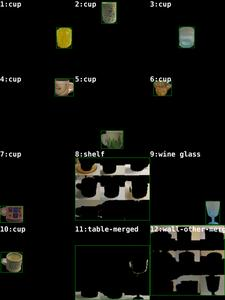
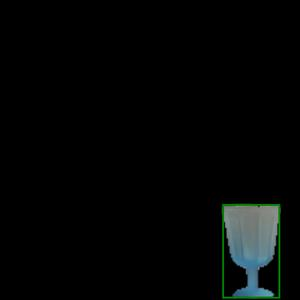

In [5]:
HTML(html_str)